In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data_for_visualization.csv', index_col='id')

In [3]:
confident_data = data[data.best_topic_weights >= 0.4]
confident_all_datetimes = confident_data.groupby(['formated_date']).agg(['count'])['date']['count']
confident_data

,date,formated_date,best_topic_weights,best_topic_label
id,,,,
9,1616511004,2021-03-23,0.827821,13
13,1616425952,2021-03-22,0.471312,8
24,1616426029,2021-03-22,0.471298,8
27,1616481257,2021-03-23,0.419706,14
36,1616345885,2021-03-21,0.814406,15
...,...,...,...,...
805313,1579875545,2020-01-24,0.608581,14
805346,1579862018,2020-01-24,0.629557,10
805388,1579700867,2020-01-22,0.500237,15


In [14]:
from matplotlib.pyplot import figure
from scipy import interpolate


def plot_for_topic(data, topic_label, all_datetimes, s):
    topic_counter = data.groupby(['best_topic_label', 'formated_date']).agg(['count']).loc[topic_label]['date']
    x = []
    x_label = []
    y = []
    for date in all_datetimes.keys():
        x_label.append(date)
        x.append(datetime.strptime(date, '%Y-%m-%d').timestamp())
        try:
            y.append(topic_counter.loc[date].values[0] / all_datetimes[date])
            if topic_counter.loc[date].values[0] / all_datetimes[date] < 0:
                print(date)
        except:
            y.append(0)
            
    figure(figsize=(8, 6), dpi=80)
    x_int = np.linspace(x[0], x[-1], 10000)
    tck = interpolate.splrep(x, y, k = 5, s = s)
    y_int = interpolate.splev(x_int, tck, der = 0)
    plt.plot(x, y)
    plt.plot(x_int, y_int, linestyle = '-', linewidth = 3, color='red')
    plt.xticks(x[::10], x_label[::10], rotation='vertical')
    plt.ylabel(topic_label)
    plt.show()

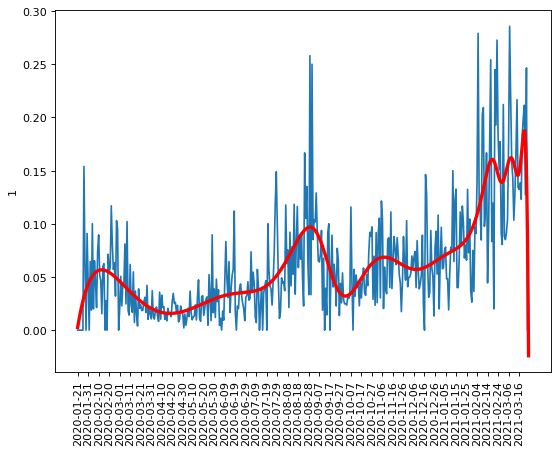

In [25]:
# дом, сидеть, работать, карантин, работа
plot_for_topic(confident_data, 1, confident_all_datetimes, 0.55)

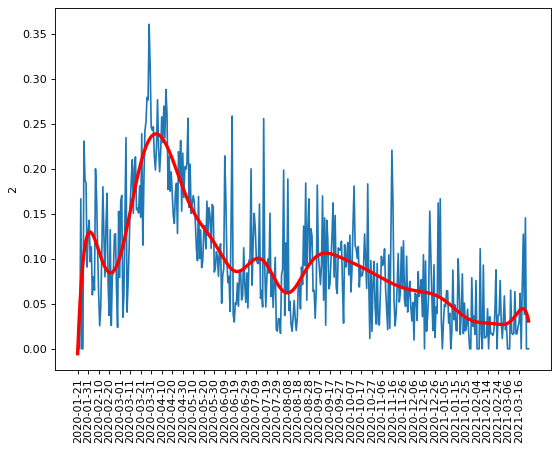

In [29]:
# врач тест больница день температура
plot_for_topic(confident_data, 2, confident_all_datetimes, 0.8)

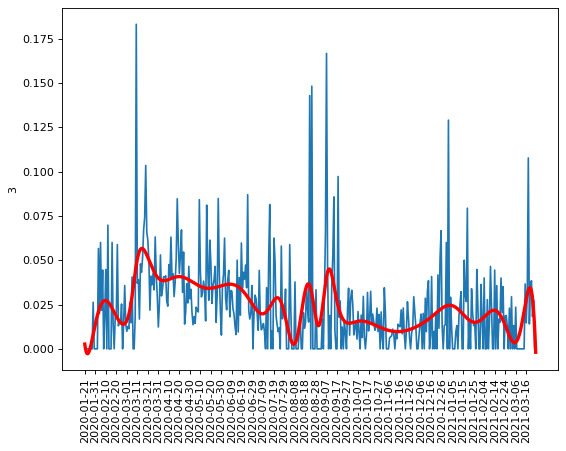

In [32]:
# деньга работать год государство страна
plot_for_topic(confident_data, 3, confident_all_datetimes, 0.21)

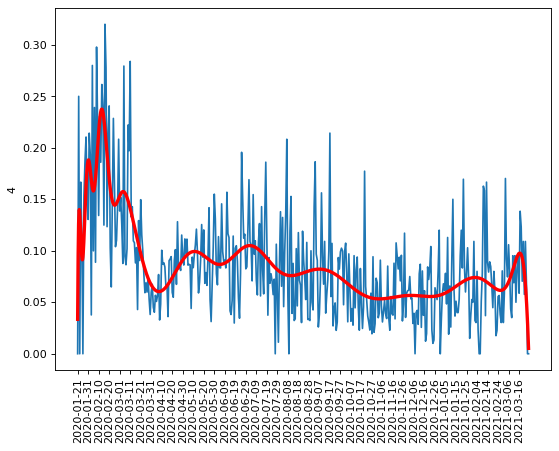

In [40]:
# ребенок ваш знать говорить писать
plot_for_topic(confident_data, 4, confident_all_datetimes, 0.72)

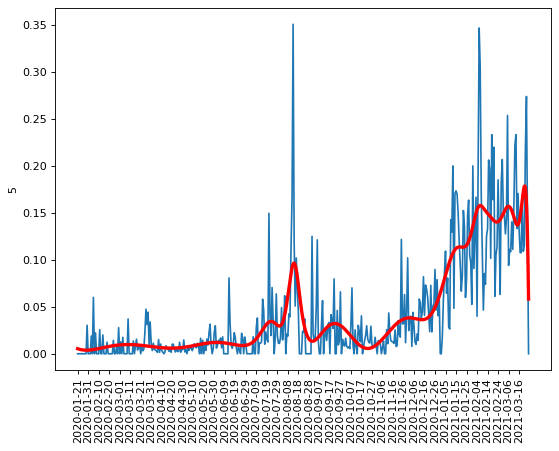

In [42]:
# вирус грипп год болезнь иммунитет
plot_for_topic(confident_data, 5, confident_all_datetimes, 0.5)

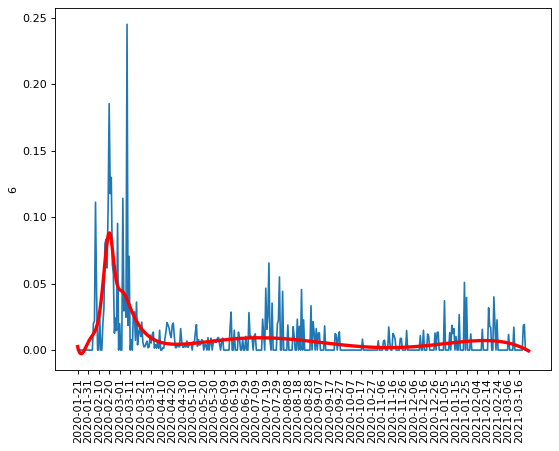

In [49]:
# статистика заболевать день страна число
plot_for_topic(confident_data, 6, confident_all_datetimes, 0.13)

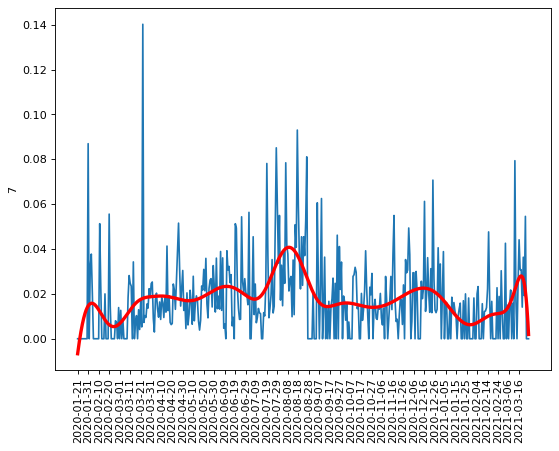

In [56]:
# маска носить рука магазин вирус
plot_for_topic(confident_data, 7, confident_all_datetimes, 0.115)

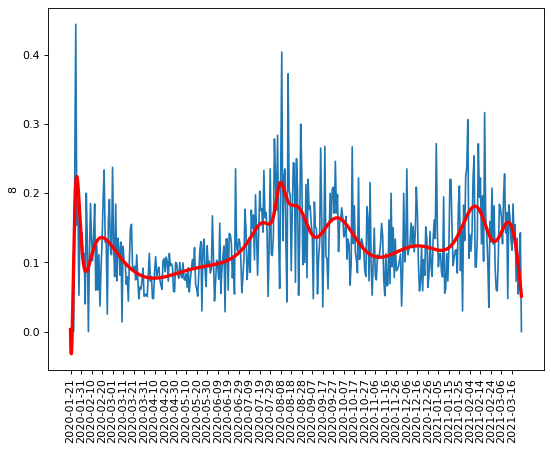

In [65]:
# закон гражданин власть право режим
plot_for_topic(confident_data, 8, confident_all_datetimes, 1.15)

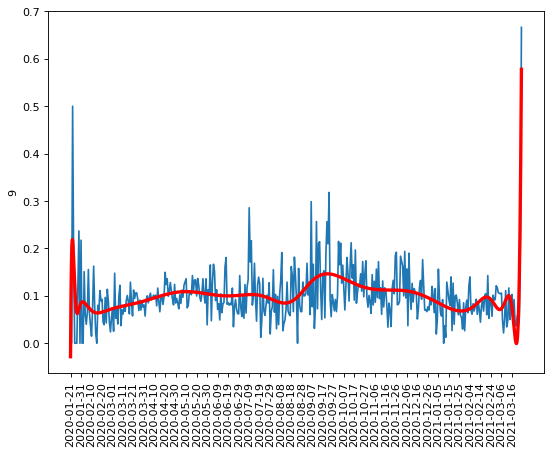

In [75]:
# страна мир россия вирус наш
plot_for_topic(confident_data, 9, confident_all_datetimes, 0.96)

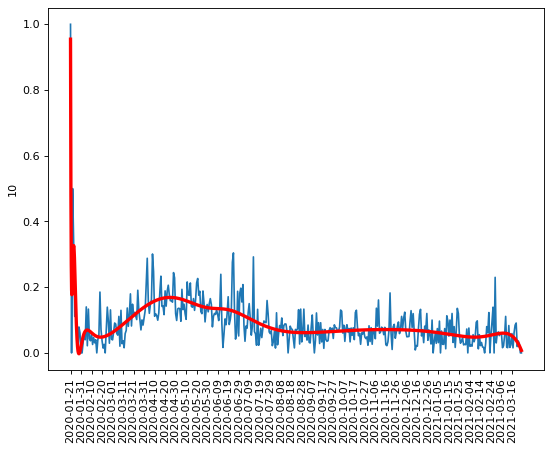

In [78]:
# инфекция случай ковид коронавирус заболевание
plot_for_topic(confident_data, 10, confident_all_datetimes, 0.9)

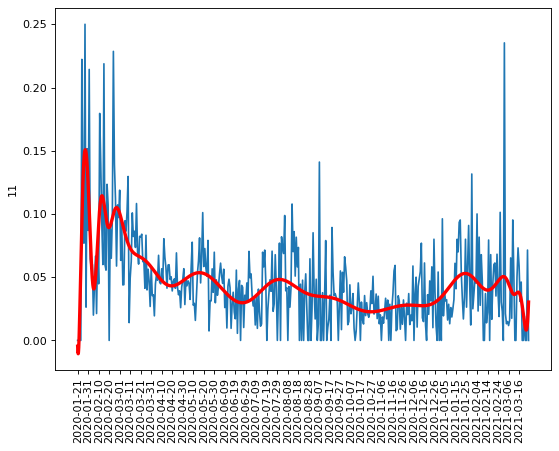

In [87]:
# бог твой ваш жизнь слово
plot_for_topic(confident_data, 11, confident_all_datetimes, 0.38)

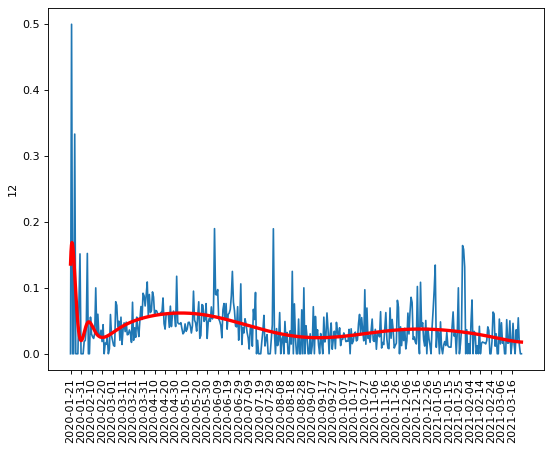

In [107]:
# вакцина вакцинация прививка год первый
plot_for_topic(confident_data, 12, confident_all_datetimes, 0.6)

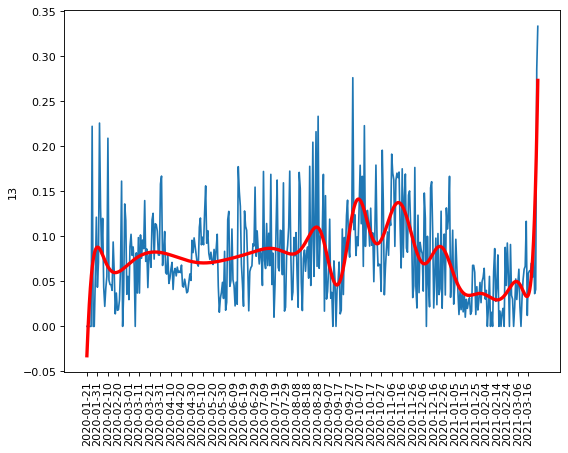

In [103]:
# вирус коронавирус новый животное covid
plot_for_topic(confident_data, 13, confident_all_datetimes, 0.75)

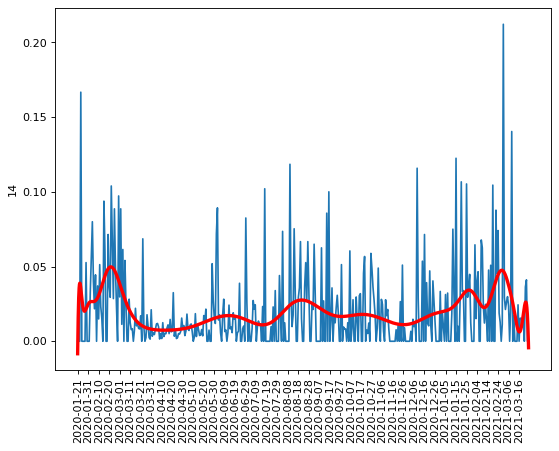

In [98]:
# область москва регион город район
plot_for_topic(confident_data, 14, confident_all_datetimes, 0.29)

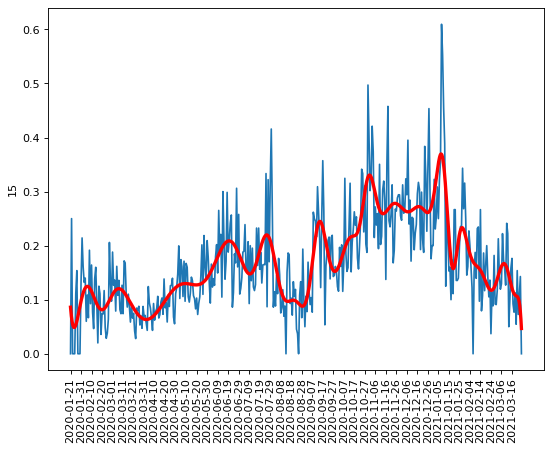

In [93]:
# МУСОР
plot_for_topic(confident_data, 15, confident_all_datetimes, 1.5)

In [220]:
np.linspace(1579208400.0, 1616619600.0, 100)

array([1.57920840e+09, 1.57958629e+09, 1.57996418e+09, 1.58034207e+09,
       1.58071996e+09, 1.58109785e+09, 1.58147575e+09, 1.58185364e+09,
       1.58223153e+09, 1.58260942e+09, 1.58298731e+09, 1.58336520e+09,
       1.58374309e+09, 1.58412098e+09, 1.58449887e+09, 1.58487676e+09,
       1.58525465e+09, 1.58563255e+09, 1.58601044e+09, 1.58638833e+09,
       1.58676622e+09, 1.58714411e+09, 1.58752200e+09, 1.58789989e+09,
       1.58827778e+09, 1.58865567e+09, 1.58903356e+09, 1.58941145e+09,
       1.58978935e+09, 1.59016724e+09, 1.59054513e+09, 1.59092302e+09,
       1.59130091e+09, 1.59167880e+09, 1.59205669e+09, 1.59243458e+09,
       1.59281247e+09, 1.59319036e+09, 1.59356825e+09, 1.59394615e+09,
       1.59432404e+09, 1.59470193e+09, 1.59507982e+09, 1.59545771e+09,
       1.59583560e+09, 1.59621349e+09, 1.59659138e+09, 1.59696927e+09,
       1.59734716e+09, 1.59772505e+09, 1.59810295e+09, 1.59848084e+09,
       1.59885873e+09, 1.59923662e+09, 1.59961451e+09, 1.59999240e+09,
      

In [123]:
all_datetimes.keys()

Index(['2020-01-17', '2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
       '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
       ...
       '2021-03-16', '2021-03-17', '2021-03-18', '2021-03-19', '2021-03-20',
       '2021-03-21', '2021-03-22', '2021-03-23', '2021-03-24', '2021-03-25'],
      dtype='object', name='formated_date', length=431)

In [98]:
data.groupby(['best_topic_label', 'formated_date']).agg(['count']).loc[1]['date']

,count
formated_date,
2020-01-27,4
2020-01-28,1
2020-01-30,4
2020-01-31,2
2020-02-01,3
...,...
2021-03-19,16
2021-03-20,11
2021-03-21,11


In [68]:
topic_counter.loc['2020-01-23'].values[0]

1

In [72]:
date = '2020-01-23'
topic_counter.loc[date].values[0] / all_datetimes[date]

0.3333333333333333

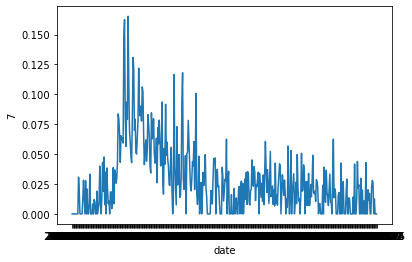

In [74]:
topic = 7
topic_counter = data.groupby(['best_topic_label', 'formated_date']).agg(['count']).loc[topic]['date']
x= []
y = []
for date in all_datetimes.keys():
    x.append(date)
    try:
        y.append(topic_counter.loc[date].values[0] / all_datetimes[date])
    except:
        y.append(0)

plt.plot(x, y)
plt.xlabel("date")
plt.ylabel(topic)
plt.show()